In [1]:
require 'cudnn'
require 'inn'
require 'image'
require 'dcnn'

-- Loads the mapping from net outputs to human readable labels
function load_synset()
  local file = io.open 'synset_words.txt'
  local list = {}
  while true do
    local line = file:read()
    if not line then break end
    table.insert(list, string.sub(line,11))
  end
  return list
end

-- Converts an image from RGB to BGR format and subtracts mean
function preprocess(im, img_mean)
  -- rescale the image
  local im3 = image.scale(im,224,224,'bilinear')*255
  -- RGB2BGR
  local im4 = im3:clone()
  im4[{1,{},{}}] = im3[{3,{},{}}]
  im4[{3,{},{}}] = im3[{1,{},{}}]

  -- subtract imagenet mean
  return im4 - image.scale(img_mean, 224, 224, 'bilinear')
end

-- Setting up networks 
print '==> Loading network'

--net = torch.load('/home/yusheng/Workspace/DeepLearning/models/zeilerNet/zeilerNet.net')
net = torch.load('/usr/local/data/zeilerNet/zeilerNet.net')
net:cuda()
-- as we want to classify, let's disable dropouts by enabling evaluation mode
net:evaluate()

print '==> Loading synsets'
synset_words = load_synset()

print '==> Loading image and imagenet mean'
image_name = 'Goldfish3.jpg'
--image_name = 'lena.jpg'
--image_name='people2.jpg'
img_mean_name = 'ilsvrc_2012_mean.t7'

im = image.load(image_name)
img_mean = torch.load(img_mean_name).img_mean:transpose(3,1)

-- Have to resize and convert from RGB to BGR and subtract mean
print '==> Preprocessing'
I = preprocess(im, img_mean)

-- Replace pooling by dual pooling
unpooling_layers = dcnn:ReplaceDualPoolingModule(net:get(1))

_,classes = net:forward(I:cuda()):view(-1):float():sort(true)

for i=1,5 do
  print('predicted class '..tostring(i)..': ', synset_words[classes[i] ])
end

==> Loading network	


==> Loading synsets	
==> Loading image and imagenet mean	


==> Preprocessing	


predicted class 1: 	goldfish, Carassius auratus	
predicted class 2: 	macaw	
predicted class 3: 	flamingo	
predicted class 4: 	axolotl, mud puppy, Ambystoma mexicanum	
predicted class 5: 	eft	


In [4]:
net:get(1)

nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> (11) -> (12) -> (13) -> (14) -> output]
  (1): cudnn.SpatialConvolution(3 -> 96, 7x7, 2,2, 1,1)
  (2): cudnn.ReLU
  (3): inn.SpatialSameResponseNormalization
  (4): dcnn.DualSpatialMaxPooling(3,3,2,2)
  (5): cudnn.SpatialConvolution(96 -> 256, 5x5, 2,2)
  (6): cudnn.ReLU
  (7): inn.SpatialSameResponseNormalization
  (8): dcnn.DualSpatialMaxPooling(3,3,2,2)
  (9): cudnn.SpatialConvolution(256 -> 384, 3x3, 1,1, 1,1)
  (10): cudnn.ReLU
  (11): cudnn.SpatialConvolution(384 -> 384, 3x3, 1,1, 1,1)
  (12): cudnn.ReLU
  (13): cudnn.SpatialConvolution(384 -> 256, 3x3, 1,1, 1,1)
  (14): cudnn.ReLU
}
{
  gradInput : CudaTensor - empty
  modules : 
    {
      1 : 
        cudnn.SpatialConvolution(3 -> 96, 7x7, 2,2, 1,1)
        {
          padW : 1
          nInputPlane : 3
     

     output : CudaTensor - size: 96x110x110
          gradInput : CudaTensor - size: 3x224x224
          iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x40838868
          iSize : LongStorage - size: 4
          convDesc : cdata<struct cudnnConvolutionStruct *[1]>: 0x41820630
          output_offset : 1161600
          gradBias : CudaTensor - size: 96
          algType : cdata<enum 761 [?]>: 0x41f06830
          extraBuffer : CudaTensor - size: 147
          extraBufferSizeInBytes : 588
          oDescForBias : cdata<struct cudnnTensorStruct *[1]>: 0x400f6bd8
          oDesc : cdata<struct cudnnTensorStruct *[1]>: 0x414b0478
          groups : 1
          dH : 2
          dW : 2
          nOutputPlane : 96
          bias : CudaTensor - size: 96
          kH : 7
   

       weight_offset : 14112
          finput : CudaTensor - empty
          biasDesc : cdata<struct cudnnTensorStruct *[1]>: 0x418235f8
          input_offset : 150528
          weight : CudaTensor - size: 96x3x7x7
          train : false
          gradWeight : CudaTensor - size: 96x3x7x7
          fgradInput : CudaTensor - empty
          kW : 7
          padH : 1
          weightDesc : cdata<struct cudnnFilterStruct *[1]>: 0x40127ef0
        }
      2 : 
        cudnn.ReLU
        {
          inplace : true
          mode : CUDNN_ACTIVATION_RELU
          train : false
          output : CudaTensor - size: 96x110x110
          gradInput : CudaTensor - empty


          nElem : 1161600
          iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41010068
        }
      3 : 
        inn.SpatialSameResponseNormalization
        {
          alpha : 5e-05
          train : false
          output : CudaTensor - size: 96x110x110
          gradInput : CudaTensor - empty
          size : 3
          beta : 0.75
          modules : 
            nn.Sequential {
              [input -> (1) -> (2) -> output]
              (1): nn.ConcatTable {
                input
                  |`-> (1): nn.Identity
                  |`-> (2): nn.Sequential {
                  |      [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> output]
                  |      (1): nn.SpatialZeroPadding(l=1,r=1,t=1,b=1)
                  |      (2): nn.Power
                  |      (3): nn.SpatialAveragePooling(3,3,1,1)
                  |      (4): nn.MulConstant
                  |      (5): nn.AddConstant
                  |      (6): nn.Power
                  |    }
    

                  1 : nn.ConcatTable {
  input
    |`-> (1): nn.Identity
    |`-> (2): nn.Sequential {
    |      [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> output]
    |      (1): nn.SpatialZeroPadding(l=1,r=1,t=1,b=1)
    |      (2): nn.Power
    |      (3): nn.SpatialAveragePooling(3,3,1,1)
    |      (4): nn.MulConstant
    |      (5): nn.AddConstant
    |      (6): nn.Power
    |    }
     ... -> output
}
                  2 : nn.CDivTable
                }
              output : CudaTensor - size: 96x110x110
            }
        }
      4 : 
        dcnn.DualSpatialMaxPooling(3,3,2,2)
        {
          dH : 2
          dW : 2
          padH : 0
          gradInput : CudaTensor - empty
          indices : CudaTensor - size: 96x55x55
          dualModule : 
            dcnn.DualSpatialMaxUnpooling
            {
              gradInput : CudaTensor - empty
              dualModule : 
                dcnn.DualSpatialMaxPooling(3,3,2,2)
                {
   

               dH : 2
                  dW : 2
                  padH : 0
                  gradInput : CudaTensor - empty
                  indices : CudaTensor - size: 96x55x55
                  dualModule : dcnn.DualSpatialMaxUnpooling
                  kH : 3
                  output : CudaTensor - size: 96x55x55
                  padW : 0
                  kW : 3
                }
              output : CudaTensor - size: 96x110x110
            }
          kH : 3
          output : CudaTensor - size: 96x55x55
          padW : 0
          kW : 3
        }
      5 : 
        

cudnn.SpatialConvolution(96 -> 256, 5x5, 2,2)
        {
          padW : 0
          nInputPlane : 96
          output : CudaTensor - size: 256x26x26
          gradInput : CudaTensor - size: 96x55x55
          iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x40833698
          iSize : LongStorage - size: 4
          convDesc : cdata<struct cudnnConvolutionStruct *[1]>: 0x41b2b2f8


          output_offset : 173056
          gradBias : CudaTensor - size: 256
          algType : cdata<enum 761 [?]>: 0x40593c88
          extraBuffer : CudaTensor - size: 2400
          extraBufferSizeInBytes : 9600
          oDescForBias : cdata<struct cudnnTensorStruct *[1]>: 0x401d54c8
          oDesc : cdata<struct cudnnTensorStruct *[1]>: 0x414a7368
          groups : 1
          dH : 2
          dW : 2
          nOutputPlane : 256
          bias : CudaTensor - size: 256


          kH : 5
          weight_offset : 614400
          finput : CudaTensor - empty
          biasDesc : cdata<struct cudnnTensorStruct *[1]>: 0x40836c88
          input_offset : 290400
          weight : CudaTensor - size: 256x96x5x5
          train : false
          gradWeight : CudaTensor - size: 256x96x5x5
          fgradInput : CudaTensor - empty
          kW : 5
          padH : 0
          weightDesc : cdata<struct cudnnFilterStruct *[1]>: 0x40837c38
        }
      6 : 
        cudnn.ReLU
        {


          inplace : true
          mode : CUDNN_ACTIVATION_RELU
          train : false
          output : CudaTensor - size: 256x26x26
          gradInput : CudaTensor - empty
          nElem : 173056
          iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41b8a478
        }
      7 : 
        inn.SpatialSameResponseNormalization
        {
          alpha : 5e-05
          train : false
          output : CudaTensor - size: 256x26x26
          gradInput : CudaTensor - empty
          size : 3


          beta : 0.75
          modules : 
            nn.Sequential {
              [input -> (1) -> (2) -> output]
              (1): nn.ConcatTable {
                input
                  |`-> (1): nn.Identity
                  |`-> (2): nn.Sequential {
                  |      [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> output]
                  |      (1): nn.SpatialZeroPadding(l=1,r=1,t=1,b=1)
                  |      (2): nn.Power
                  |      (3): nn.SpatialAveragePooling(3,3,1,1)
                  |      (4): nn.MulConstant
                  |      (5): nn.AddConstant
                  |      (6): nn.Power
                  |    }
                   ... -> output
              }
              (2): nn.CDivTable
            }
            {
              gradInput : CudaTensor - empty
              modules : 
                {
  

                1 : nn.ConcatTable {
  input
    |`-> (1): nn.Identity
    |`-> (2): nn.Sequential {
    |      [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> output]
    |      (1): nn.SpatialZeroPadding(l=1,r=1,t=1,b=1)
    |      (2): nn.Power
    |      (3): nn.SpatialAveragePooling(3,3,1,1)
    |      (4): nn.MulConstant
    |      (5): nn.AddConstant
    |      (6): nn.Power
    |    }
     ... -> output
}
                  2 : nn.CDivTable
                }
              output : CudaTensor - size: 256x26x26
            }
        }
      8 : 
        dcnn.DualSpatialMaxPooling(3,3,2,2)
        {
          dH : 2
          dW : 2
          padH : 0
          gradInput : CudaTensor - empty
          indices : CudaTensor - size: 256x13x13
          dualModule : 
            dcnn.DualSpatialMaxUnpooling
            {
              gradInput : CudaTensor - empty
              dualModule : 
                dcnn.DualSpatialMaxPooling(3,3,2,2)
                {
                  dH

                  output : CudaTensor - size: 256x13x13
                  padW : 0
                  kW : 3
                }
              output : CudaTensor - size: 256x26x26
            }
          kH : 3
          output : CudaTensor - size: 256x13x13
          padW : 0
          kW : 3
        }
      9 : 
        cudnn.SpatialConvolution(256 -> 384, 3x3, 1,1, 1,1)
        {
          padW : 1
          nInputPlane : 256
          output : CudaTensor - size: 384x13x13
          gradInput : CudaTensor - size: 256x13x13
          iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x4193b948
          iSize : LongStorage - size: 4
          convDesc : cdata<struct cudnnConvolutionStruct *[1]>: 0x41f4c210
          output_offset : 64896
          gradBias : CudaTensor - size: 384
          algType : cdata<enum 761 [?]>: 0x40fd3d90
          extraBuffer : CudaTensor - size: 2304
          extraBufferSizeInBytes : 9216
          oDescForBias : cdata<struct cudnnTensorStruct *[1]>: 0x4013d77

dH : 1
          dW : 1
          nOutputPlane : 384
          bias : CudaTensor - size: 384
          kH : 3
          weight_offset : 884736
          finput : CudaTensor - empty
          biasDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41945c80
          input_offset : 43264
          weight : CudaTensor - size: 384x256x3x3
          train : false
          gradWeight : CudaTensor - size: 384x256x3x3
          fgradInput : CudaTensor - empty
          kW : 3
          padH : 1
          weightDesc : cdata<struct cudnnFilterStruct *[1]>: 0x41b97010
        }
      10 : 
        cudnn.ReLU
        {
          inplace : true
          mode : CUDNN_ACTIVATION_RELU
          train : false
          output : CudaTensor - size: 384x13x13
          gradInput : CudaTensor - empty
          nElem : 64896
          iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41932a08
        }
      11 : 
        cudnn.SpatialConvolution(384 -> 384, 3x3, 1,1, 1,1)
        {
          padW : 1
          

    iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41bd9c60
          iSize : LongStorage - size: 4
          convDesc : cdata<struct cudnnConvolutionStruct *[1]>: 0x41bdbb38
          output_offset : 64896
          gradBias : CudaTensor - size: 384
          algType : cdata<enum 761 [?]>: 0x41b2f428
          extraBuffer : CudaTensor - size: 3456
          extraBufferSizeInBytes : 13824
          oDescForBias : cdata<struct cudnnTensorStruct *[1]>: 0x41b1cf68
          oDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41b1a758
          groups : 1
          dH : 1
          dW : 1
          nOutputPlane : 384
          bias : CudaTensor - size: 384
          kH : 3
          weight_offset : 1327104
          finput : CudaTensor - empty
          biasDesc : cdata<struct cudnnTensorStruct *[1]>: 0x4013b400
          input_offset : 64896
          weight : CudaTensor - size: 384x384x3x3
          train : false
          gradWeight : CudaTensor - size: 384x384x3x3
          fgradInput : C

    gradInput : CudaTensor - empty
          nElem : 64896
          iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x419504d0
        }
      13 : 
        cudnn.SpatialConvolution(384 -> 256, 3x3, 1,1, 1,1)
        {
          padW : 1
          nInputPlane : 384
          output : CudaTensor - size: 256x13x13
          gradInput : CudaTensor - size: 384x13x13
          iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x406b60d8
          iSize : LongStorage - size: 4
          convDesc : cdata<struct cudnnConvolutionStruct *[1]>: 0x406bac28
          output_offset : 43264
          gradBias : CudaTensor - size: 256
          algType : cdata<enum 761 [?]>: 0x41b91690
          extraBuffer : CudaTensor - size: 3456
          extraBufferSizeInBytes : 13824
          oDescForBias : cdata<struct cudnnTensorStruct *[1]>: 0x4081cd98
          oDesc : cdata<struct cudnnTensorStruct *[1]>: 0x406c7538
          groups : 1
          dH : 1
          dW : 1
          nOutputPlane : 256
          bi

 gradWeight : CudaTensor - size: 256x384x3x3
          fgradInput : CudaTensor - empty
          kW : 3
          padH : 1
          weightDesc : cdata<struct cudnnFilterStruct *[1]>: 0x411657f8
        }
      14 : 
        cudnn.ReLU
        {
          inplace : true
          mode : CUDNN_ACTIVATION_RELU
          train : false
          output : CudaTensor - size: 256x13x13
          gradInput : CudaTensor - empty
          nElem : 43264
          iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x418211f8
        }
    }
  train : false
  output : CudaTensor - size: 256x13x13
}


In [2]:
function dcnn:CreateDeconvNet( net, unpooling_layers, input_img, layer_num, neuron_index, normal_deconv  )
    neuron_index = neuron_index or 0
    if neuron_index == true then
        neuron_index = 0 
        normal_deconv = true
    end
    
    if neuron_index == false then
        neuron_index = 0 
        normal_deconv = false
    end 
    
    local deconvNet = nn.Sequential()
    local first_deconv = true
    for i=layer_num,1,-1 do
        if torch.typename( net:get(i)) == 'cudnn.SpatialConvolution' then
            local reconstructed_size = 0
            if i==1 then
                reconstructed_size = input_img:size(2)
            else    
                reconstructed_size = net:get(i-1).output:size(2)
            end
                
            if first_deconv == true then
                --print( net:get(i) )
                if neuron_index ~= 0 then 
                    deconvNet:add( cudnn.SpatialDeconvolution( net:get(i), reconstructed_size, neuron_index ))
                    --print(neuron_index)
                else
                    deconvNet:add( cudnn.SpatialDeconvolution( net:get(i), reconstructed_size, normal_deconv ))
                end
                
                first_deconv = false
            else
                deconvNet:add( cudnn.SpatialDeconvolution( net:get(i), reconstructed_size, true ))
            end
            
        elseif torch.typename( net:get(i)) == 'dcnn.DualSpatialMaxPooling' then
            local unpooling_idx = 1
            for j=i,1,-1 do  
                if j-1 > 1 and torch.typename( net:get(j-1)) == 'dcnn.DualSpatialMaxPooling' then
                   unpooling_idx = unpooling_idx + 1
                end
            end
            
            deconvNet:add( unpooling_layers[unpooling_idx])
            
        elseif torch.typename( net:get(i)) == 'cudnn.ReLU' then
            deconvNet:add(dcnn.GuidedReLU(net:get(i-1)))
        else
            print( torch.typename( net:get(i))..' This type of layer is not supported !')
        end
        
        --print('Layer '..i..' is complete ')
    end    
        
    --deconvNet:cuda()
    return deconvNet
end

cudnn.SpatialConvolution(384 -> 256, 3x3, 1,1, 1,1)	
deconv layer has been built !	


cudnn.SpatialConvolution(384 -> 384, 3x3, 1,1, 1,1)	
deconv layer has been built !	


cudnn.SpatialConvolution(256 -> 384, 3x3, 1,1, 1,1)	
deconv layer has been built !	
inn.SpatialSameResponseNormalization This type of layer is not supported !	


cudnn.SpatialConvolution(96 -> 256, 5x5, 2,2)	
deconv layer has been built !	
inn.SpatialSameResponseNormalization This type of layer is not supported !	


cudnn.SpatialConvolution(3 -> 96, 7x7, 2,2, 1,1)	
deconv layer has been built !	


==> Time elapsed: 0.153235912323 seconds	


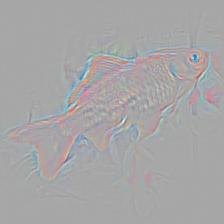

In [3]:
deconvNet_test2 = dcnn:CreateDeconvNet( net:get(1), unpooling_layers, I, 13, 153 )
deconv_timer3 = torch.Timer()
vis_c5_test2 = deconvNet_test2:forward(net:get(1):get(13).output)

print('==> Time elapsed: ' .. deconv_timer3:time().real .. ' seconds')
itorch.image(vis_c5_test2 )


cudnn.SpatialConvolution(384 -> 256, 3x3, 1,1, 1,1)	
deconv layer has been built !	


cudnn.SpatialConvolution(384 -> 384, 3x3, 1,1, 1,1)	
deconv layer has been built !	


cudnn.SpatialConvolution(256 -> 384, 3x3, 1,1, 1,1)	
deconv layer has been built !	
inn.SpatialSameResponseNormalization This type of layer is not supported !	


cudnn.SpatialConvolution(96 -> 256, 5x5, 2,2)	
deconv layer has been built !	
inn.SpatialSameResponseNormalization This type of layer is not supported !	


cudnn.SpatialConvolution(3 -> 96, 7x7, 2,2, 1,1)	
deconv layer has been built !	


==> Time elapsed: 0.18871903419495 seconds	


0	


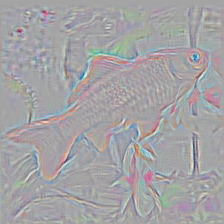

==> Time elapsed: 0.16380786895752 seconds	


0	


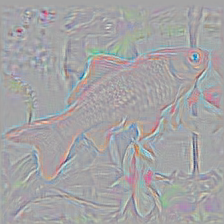

==> Time elapsed: 0.13595294952393 seconds	


0	


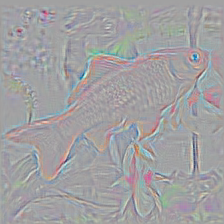

==> Time elapsed: 0.13140511512756 seconds	


0	


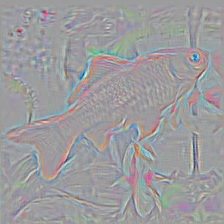

==> Time elapsed: 0.14654111862183 seconds	


0	


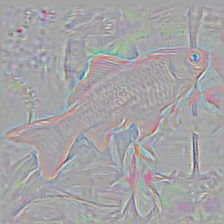

==> Time elapsed: 0.18984913825989 seconds	


0	


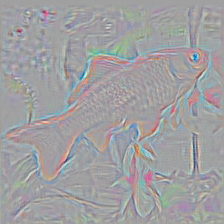

==> Time elapsed: 0.13246703147888 seconds	


0	


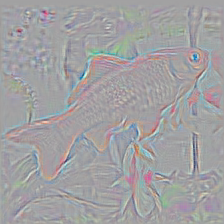

==> Time elapsed: 0.12811493873596 seconds	


0	


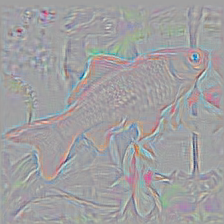

==> Time elapsed: 0.12460613250732 seconds	


0	


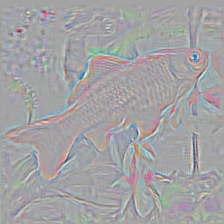

==> Time elapsed: 0.19187903404236 seconds	


0	


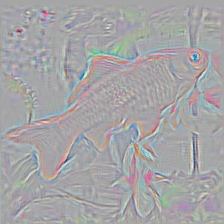

==> Time elapsed: 0.1576030254364 seconds	


0	


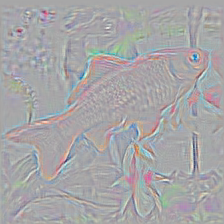

==> Time elapsed: 0.1241250038147 seconds	


0	


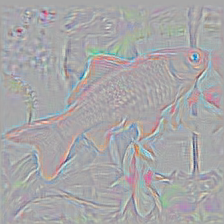

==> Time elapsed: 0.12971711158752 seconds	


0	


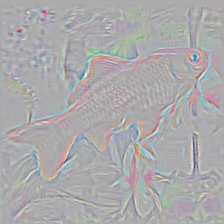

==> Time elapsed: 0.12377691268921 seconds	


0	


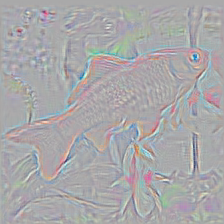

==> Time elapsed: 0.12085318565369 seconds	


0	


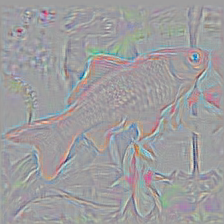

==> Time elapsed: 0.12057495117188 seconds	


0	


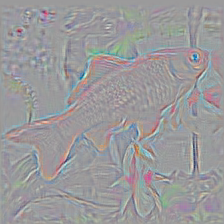

==> Time elapsed: 0.12383890151978 seconds	


0	


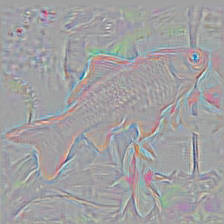

==> Time elapsed: 0.15577983856201 seconds	


0	


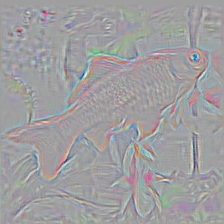

==> Time elapsed: 0.11949515342712 seconds	


0	


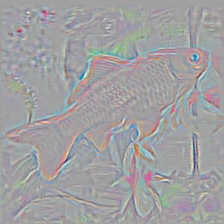

==> Time elapsed: 0.12984490394592 seconds	


0	


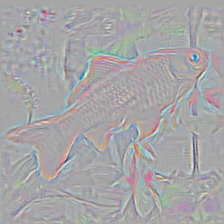

In [4]:
error_tensor = 0
last_output = 0
local last_time = 0
layer_n = 1

deconvNet_test2 = dcnn:CreateDeconvNet( net:get(layer_n), unpooling_layers, I, 13, 27 )
deconv_timer3 = torch.Timer()

for i=1,20 do
    vis_c5_test2 = deconvNet_test2:forward(net:get(1):get(13).output)

    print('==> Time elapsed: ' .. deconv_timer3:time().real-last_time .. ' seconds')    
    --print( deconvNet_test2:get(layer_n).output:size() )
    
    if i==1 then
        last_output = deconvNet_test2:get(layer_n).output
    end
    
    error_tensor = last_output - deconvNet_test2:get(layer_n).output
    local test_error = 0
    for j=1, error_tensor:view(-1):size(1) do
        test_error = test_error + error_tensor:view(-1)[j]
    end
        
    print(test_error)
    --last_output = deconvNet_test2:get(layer_n).output
    --itorch.image( deconvNet_test2:get(1).output )
    itorch.image(vis_c5_test2 )
    last_time = deconv_timer3:time().real
end